In [45]:
#############################################
### ASSIGNMENT 3 - PART 2 A     #############
###           #########
#############################################

In [ ]:
###########################################
### Explore Data               ############
##########################################

In [164]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [46]:
final_stations = pd.read_csv('final_stations.csv')
final_stations.drop(final_stations[['Unnamed: 0','Sun', 'Notes','Year']], axis=1, inplace= True) #removed Sun columns since it contains NAN values in some stations

In [47]:
weather = pd.read_csv('final_weather_Stations.csv')
weather.drop(weather[['Unnamed: 0']], axis=1, inplace= True)
weather_ll = pd.merge(final_stations, weather,left_index=True,right_index=True, how='left')
weather_copy = weather_ll.copy()

In [48]:
weather_ll.drop(weather_ll[['Stations_y']], axis=1, inplace= True)

In [90]:
le = preprocessing.LabelEncoder()
weather_ll['Location_Nr'] =le.fit_transform(weather_ll['Location'])
weather_ll

,Stations_x,Month,Tmax,Tmin,AF,Rain,Tmean,Latitude,Longtitude,Location,Location_Nr
0,aberporth,6.500,12.888889,7.687302,1.115079,78.828175,10.288095,52.139,-4.570,South,2
1,armagh,6.500,13.702381,6.274603,2.992063,69.495238,9.988492,54.352,-6.649,Central,0
2,ballypatrick,6.500,11.864928,6.249531,1.625902,113.057143,9.057229,55.181,-6.153,Central,0
3,bradford,6.500,13.282143,6.448413,3.027778,74.966270,9.865278,53.813,-1.772,Central,0
4,braemar,6.500,10.984524,3.012169,8.515873,78.164815,6.998347,57.006,-3.396,Central,0
5,camborne,6.500,13.705556,8.704762,0.607143,88.967460,11.205159,50.218,-5.327,South,2
6,cambridge,6.500,15.036508,6.726190,3.214286,47.165476,10.881349,52.245,0.102,South,2
7,cardiff,6.500,15.085317,7.323413,2.769841,100.413889,11.204365,51.488,-3.187,South,2
8,chivenor,6.500,14.702850,8.017929,1.680014,79.007143,11.360390,51.089,-4.147,South,2
9,cwmystwyth,6.125,11.787090,4.873422,5.296086,154.481250,8.330256,52.358,-3.802,South,2


In [91]:
# Create df of last 5 stations as the test set
weather_test = weather_ll.tail(5)
weather_test


,Stations_x,Month,Tmax,Tmin,AF,Rain,Tmean,Latitude,Longtitude,Location,Location_Nr
27,sheffield,6.5,13.827381,7.044444,2.162698,70.252778,10.435913,53.381,-1.490,South,2
28,southampton,2.0,10.833333,3.700000,5.000000,43.166667,7.266667,50.898,-1.408,South,2
29,stornoway,6.5,11.647475,6.279545,1.772727,101.993975,8.963510,58.214,-6.318,North,1
30,suttonbonington,6.5,14.430952,6.555159,3.396825,53.555159,10.493056,52.833,-1.250,South,2
31,tiree,6.5,12.022222,7.190476,0.781746,105.744444,9.606349,56.500,-6.880,Central,0


In [92]:
#training set is the rest of the stations after removed the last 5 stations
weather_ll.drop(weather_ll.tail(5).index,inplace=True) # drop last 5 rows


In [93]:
#Check how many stations in each class from training set
weather_ll['Location_Nr'].value_counts()

2    15
0    10
1     2
Name: Location_Nr, dtype: int64

array([[<AxesSubplot:title={'center':'Latitude'}>]], dtype=object)

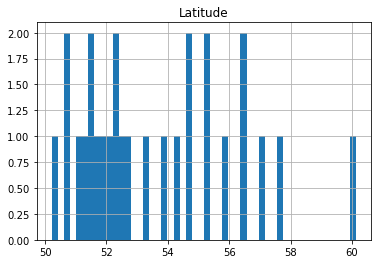

In [94]:
#Explore data a bit
weather_ll.hist(column='Latitude', bins=50)

In [53]:
###################################################
#######Part 2 A : Use K-NN (nearest neighbours)
######### Using last 5 stations as test group#####
################################################

In [96]:
# Determine features we are going to use to classification.
X_train = weather_ll[['AF','Rain','Tmin','Tmax','Tmean']].values #make sure that values are in float


In [97]:
Y_train = weather_ll['Location_Nr'].values
Y_train[0:10]

array([2, 0, 0, 0, 0, 2, 2, 2, 2, 2])

In [98]:
#X_train = preprocessing.MinMaxScaler().fit(X_train).transform(X_train.astype(float)) #normalise the data
# normalising using MinMaxScaler
preprocessing.StandardScaler(X_train, Y_train)

C:\Users\Wind\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass copy=[[  1.11507937  78.8281746    7.68730159  12.88888889  10.28809524]
 [  2.99206349  69.4952381    6.27460317  13.70238095   9.98849206]
 [  1.62590188 113.05714286   6.24953102  11.86492785   9.05722944]
 [  3.02777778  74.96626984   6.4484127   13.28214286   9.86527778]
 [  8.51587302  78.16481481   3.01216931  10.98452381   6.99834656]
 [  0.60714286  88.96746032   8.7047619   13.70555556  11.20515873]
 [  3.21428571  47.16547619   6.72619048  15.03650794  10.88134921]
 [  2.76984127 100.41388889   7.3234127   15.08531746  11.20436508]
 [  1.68001443  79.00714286   8.01792929  14.70284993  11.36038961]
 [  5.29608586 154.48125      4.87342172  11.78708965   8.33025568]
 [  2.27371332 142.26683502   6.66978114  12.87550505   9.7726431 ]
 [  3.64285714  58.22579365   5.89444444  13.34206349   9.61825397]
 [  1.16269841  66.28571429   8.77857143  14.79722222  11.78789683]
 [  6.50793651 15

StandardScaler(copy=array([[  1.11507937,  78.8281746 ,   7.68730159,  12.88888889,
         10.28809524],
       [  2.99206349,  69.4952381 ,   6.27460317,  13.70238095,
          9.98849206],
       [  1.62590188, 113.05714286,   6.24953102,  11.86492785,
          9.05722944],
       [  3.02777778,  74.96626984,   6.4484127 ,  13.28214286,
          9.86527778],
       [  8.51587302,  78.16481481,   3.01216931,  10.98452381,
          6.99834656],
       [  0.60714286,  88.96746032,   8.704...
       [  2.82142857,  57.17301587,   7.15753968,  15.21626984,
         11.18690476],
       [  3.02380952, 103.80595238,   6.43809524,  13.25793651,
          9.84801587],
       [  2.64      ,  77.16933333,   7.026     ,  14.08966667,
         10.55783333],
       [  3.21825397,  65.53452381,   6.88333333,  14.88412698,
         10.88373016],
       [  4.48809524,  57.70555556,   5.82103175,  14.02539683,
          9.92321429]]),
               with_mean=array([2, 0, 0, 0, 0, 2, 2, 2, 2, 2,

In [117]:
preprocessing.StandardScaler(X_test, Y_test)

C:\Users\Wind\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass copy=[[  2.16269841  70.25277778   7.04444444  13.82738095  10.4359127 ]
 [  5.          43.16666667   3.7         10.83333333   7.26666667]
 [  1.77272727 101.99397547   6.27954545  11.64747475   8.9635101 ]
 [  3.3968254   53.55515873   6.55515873  14.43095238  10.49305556]
 [  0.78174603 105.74444444   7.19047619  12.02222222   9.60634921]], with_mean=[2 2 1 2 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


StandardScaler(copy=array([[  2.16269841,  70.25277778,   7.04444444,  13.82738095,
         10.4359127 ],
       [  5.        ,  43.16666667,   3.7       ,  10.83333333,
          7.26666667],
       [  1.77272727, 101.99397547,   6.27954545,  11.64747475,
          8.9635101 ],
       [  3.3968254 ,  53.55515873,   6.55515873,  14.43095238,
         10.49305556],
       [  0.78174603, 105.74444444,   7.19047619,  12.02222222,
          9.60634921]]),
               with_mean=array([2, 2, 1, 2, 0]))

In [179]:
X_test = weather_test[['AF','Rain','Tmin','Tmax','Tmean']].values #make sure that values are in float
Y_test = weather_test['Location_Nr'].values
#X_test = preprocessing.MinMaxScaler().fit(X_test).transform(X_test.astype(float)) #normalise the data, optional.


In [180]:
from sklearn.neighbors import KNeighborsClassifier


In [181]:
# Let's try using k= 4
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)

# New Y values from training set
X_new = neigh.predict(X_train)

Y_new = neigh.predict(X_test)


In [182]:
# Evaluate accuracy
from sklearn.metrics import accuracy_score
print("Train set Accuracy with k= 4: ", accuracy_score(Y_train, X_new))
print("Test set Accuracy with k = 4: ", accuracy_score(Y_test, Y_new))

Train set Accuracy with k= 4:  0.6666666666666666
Test set Accuracy with k = 4:  0.6


In [127]:
# try with different ks to find out the model that provides best accuracy
#Train the model with different k using trainset and calculate accuracy with test set
K = 10
avg_accuracy = np.zeros((K-1))
std_accuracy = np.zeros((K-1))
train_accuracy = np.zeros((K-1))
for n in range(1,K):  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    Y_new = neigh.predict(X_test)
    avg_accuracy[n-1] = accuracy_score(Y_test, Y_new)
    
    train_accuracy[n-1] =accuracy_score(Y_train, X_new)
    
    std_accuracy[n-1]=np.std(Y_new ==Y_test)/np.sqrt(Y_new.shape[0])
    
print("Train set Accuracy with k=1-9: ", train_accuracy)
print("Test set Accuracy with k= 1-9: ",avg_accuracy)


Train set Accuracy with k=1-9:  [0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667]
Test set Accuracy with k= 1-9:  [0.6 0.6 0.8 0.6 0.8 0.8 0.8 0.6 0.6]


In [178]:
k = 7
#Train Model and Predict  
neigh7 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
Y_new7 = neigh7.predict(X_test)

print("Train set Accuracy with k = 7: ", accuracy_score(Y_train, neigh7.predict(X_train)))
print("Test set Accuracy with k = 7: ", accuracy_score(Y_test, Y_new7))

Train set Accuracy with k = 7:  0.6296296296296297
Test set Accuracy with k = 7:  0.8


In [124]:
k = 3
#Train Model and Predict  
neigh3 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
Y_new3 = neigh3.predict(X_test)

print("Train set Accuracy with k = 3: ", accuracy_score(Y_train, neigh3.predict(X_train)))
print("Test set Accuracy with k = 3: ",accuracy_score(Y_test, Y_new3))

Train set Accuracy with k = 3:  0.7407407407407407
Test set Accuracy with k = 3:  0.8


In [125]:
k = 2
#Train Model and Predict  
neigh2 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
Y_new2 = neigh2.predict(X_test)

print("Train set Accuracy with k = 2: ", accuracy_score(Y_train, neigh2.predict(X_train)))
print("Test set Accuracy with k = 2: ",accuracy_score(Y_test, Y_new3))

Train set Accuracy with k = 2:  0.7777777777777778
Test set Accuracy with k = 2:  0.8


In [128]:
k = 5
#Train Model and Predict  
neigh5 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
Y_new5 = neigh5.predict(X_test)

print("Train set Accuracy with k = 5: ", accuracy_score(Y_train, neigh5.predict(X_train)))
print("Test set Accuracy with k = 5: ", accuracy_score(Y_test, Y_new5))

Train set Accuracy with k = 5:  0.6666666666666666
Test set Accuracy with k = 5:  0.8


In [129]:
k = 6
#Train Model and Predict  
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
Y_new6 = neigh6.predict(X_test)

print("Train set Accuracy with k = 6: ", accuracy_score(Y_train, neigh6.predict(X_train)))
print("Test set Accuracy with k = 6: ", accuracy_score(Y_test, Y_new6))

Train set Accuracy with k = 6:  0.5925925925925926
Test set Accuracy with k = 6:  0.8


In [632]:
##################################################
###### Try train_test_split instead  #############
###################################################

In [130]:
weather_copy['Location_Nr'] =le.fit_transform(weather_copy['Location'])
weather_copy.head()

,Stations_x,Month,Tmax,Tmin,AF,Rain,Tmean,Stations_y,Latitude,Longtitude,Location,Location_Nr
0,aberporth,6.5,12.888889,7.687302,1.115079,78.828175,10.288095,aberporth,52.139,-4.570,South,2
1,armagh,6.5,13.702381,6.274603,2.992063,69.495238,9.988492,armagh,54.352,-6.649,Central,0
2,ballypatrick,6.5,11.864928,6.249531,1.625902,113.057143,9.057229,ballypatrick,55.181,-6.153,Central,0
3,bradford,6.5,13.282143,6.448413,3.027778,74.966270,9.865278,bradford,53.813,-1.772,Central,0
4,braemar,6.5,10.984524,3.012169,8.515873,78.164815,6.998347,braemar,57.006,-3.396,Central,0


In [131]:
# We can try to set randomly the training and test size instead of removing 5 last stations
# 5 out of 37 meaning the train-test split is 87/13
from sklearn.model_selection import train_test_split

X1 = weather_copy[['AF','Rain','Tmean','Tmax','Tmean']].values #makre sure that values are in float
Y1 = weather_copy['Location_Nr'].values
#X1 = preprocessing.MinMaxScaler().fit(X1).transform(X1.astype(float)) #normalise the data

# spilt 80/20, according to pareto principle
X1_train, X1_test, Y1_train, Y1_test = train_test_split( X1, Y1, test_size=0.2, random_state=42, stratify=Y1)
print ('Train set:', X1_train.shape,  Y1_train.shape)
print ('Test set:', X1_test.shape,  Y1_test.shape)



Train set: (29, 5) (29,)
Test set: (8, 5) (8,)


In [132]:
# Standardise Training set

preprocessing.StandardScaler(X1_train, Y1_train)

C:\Users\Wind\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass copy=[[  4.24646465  56.58189755   8.98356061  12.73582973   8.98356061]
 [  2.33297258  57.8705267   10.06760462  13.45865801  10.06760462]
 [  0.78174603 105.74444444   9.60634921  12.02222222   9.60634921]
 [  4.48809524  57.70555556   9.92321429  14.02539683   9.92321429]
 [  3.02777778  74.96626984   9.86527778  13.28214286   9.86527778]
 [  3.3968254   53.55515873  10.49305556  14.43095238  10.49305556]
 [  5.          43.16666667   7.26666667  10.83333333   7.26666667]
 [  2.10714286  52.75595238  11.87222222  15.78888889  11.87222222]
 [  1.68001443  79.00714286  11.36038961  14.70284993  11.36038961]
 [  2.77380952  53.04404762  10.36646825  13.98928571  10.36646825]
 [  2.76984127 100.41388889  11.20436508  15.08531746  11.20436508]
 [  2.21031746 105.63285714   7.86230159   9.94325397   7.86230159]
 [  3.02380952 103.80595238   9.84801587  13.25793651   9.84801587]
 [  3.21825397  6

StandardScaler(copy=array([[  4.24646465,  56.58189755,   8.98356061,  12.73582973,
          8.98356061],
       [  2.33297258,  57.8705267 ,  10.06760462,  13.45865801,
         10.06760462],
       [  0.78174603, 105.74444444,   9.60634921,  12.02222222,
          9.60634921],
       [  4.48809524,  57.70555556,   9.92321429,  14.02539683,
          9.92321429],
       [  3.02777778,  74.96626984,   9.86527778,  13.28214286,
          9.86527778],
       [  3.3968254 ,  53.55515873,  10....
       [  2.64      ,  77.16933333,  10.55783333,  14.08966667,
         10.55783333],
       [  2.01938432,  53.85039683,  10.79327922,  14.03570948,
         10.79327922],
       [  1.77272727, 101.99397547,   8.9635101 ,  11.64747475,
          8.9635101 ],
       [  3.21428571,  47.16547619,  10.88134921,  15.03650794,
         10.88134921],
       [  2.45238095,  48.33113276,   9.82622655,  12.85757576,
          9.82622655]]),
               with_mean=array([1, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,

In [133]:
# standardise testing set
preprocessing.StandardScaler(X1_test, Y1_test)

C:\Users\Wind\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass copy=[[  5.29608586 154.48125      8.33025568  11.78708965   8.33025568]
 [  4.04365079  60.63531746  10.77242063  15.00039683  10.77242063]
 [  8.51587302  78.16481481   6.99834656  10.98452381   6.99834656]
 [  3.11111111  65.2968254    8.36190476  11.19166667   8.36190476]
 [  4.40079365  61.4984127    9.1140873   12.81190476   9.1140873 ]
 [  2.82142857  57.17301587  11.18690476  15.21626984  11.18690476]
 [  6.50793651 155.1234127    7.85099206  11.56468254   7.85099206]
 [  0.60714286  88.96746032  11.20515873  13.70555556  11.20515873]], with_mean=[2 2 0 1 0 2 0 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


StandardScaler(copy=array([[  5.29608586, 154.48125   ,   8.33025568,  11.78708965,
          8.33025568],
       [  4.04365079,  60.63531746,  10.77242063,  15.00039683,
         10.77242063],
       [  8.51587302,  78.16481481,   6.99834656,  10.98452381,
          6.99834656],
       [  3.11111111,  65.2968254 ,   8.36190476,  11.19166667,
          8.36190476],
       [  4.40079365,  61.4984127 ,   9.1140873 ,  12.81190476,
          9.1140873 ],
       [  2.82142857,  57.17301587,  11.18690476,  15.21626984,
         11.18690476],
       [  6.50793651, 155.1234127 ,   7.85099206,  11.56468254,
          7.85099206],
       [  0.60714286,  88.96746032,  11.20515873,  13.70555556,
         11.20515873]]),
               with_mean=array([2, 2, 0, 1, 0, 2, 0, 2]))

In [194]:
# find accuracies of different k using train test split 80%20
neigh_ = KNeighborsClassifier(n_neighbors = k).fit(X1_train,Y1_train)
# New Y values from training set
X1_new = neigh_.predict(X1_train)

Y1_new = neigh_.predict(X1_test)

In [197]:
k=3
neigh_ = KNeighborsClassifier(n_neighbors = k).fit(X1_train,Y1_train)
knn.fit(X1_train,Y1_train)
print('Accuracy of training set when k=3', accuracy_score(Y1_train, neigh_.predict(X1_train)))

Accuracy of training set when k=3 0.7586206896551724


In [198]:
k= 3
print('Accuracy of test set when k=3', accuracy_score(Y1_test, neigh_.predict(X1_test)))

Accuracy of test set when k=3 0.5


In [203]:
k = 7

neigh_7 = KNeighborsClassifier(n_neighbors = k).fit(X1_train,Y1_train)
print('Accuracy of training set when k=7', accuracy_score(Y1_train, neigh_7.predict(X1_train)))
print('Accuracy of test set when k=7', accuracy_score(Y1_test, neigh_7.predict(X1_test)))

Accuracy of training set when k=7 0.6896551724137931
Accuracy of test set when k=7 0.625


In [200]:
k = 5

neigh_5a = KNeighborsClassifier(n_neighbors = k).fit(X1_train,Y1_train)
print('Accuracy of training set when k=5', accuracy_score(Y1_train, neigh_5a.predict(X1_train)))
print('Accuracy of test set when k=5', accuracy_score(Y1_test, neigh_5a.predict(X1_test)))

Accuracy of training set when k=5 0.7241379310344828
Accuracy of test set when k=5 0.5


In [201]:
k = 2

neigh_2a = KNeighborsClassifier(n_neighbors = k).fit(X1_train,Y1_train)
print('Accuracy of training set when k=2', accuracy_score(Y1_train, neigh_2a.predict(X1_train)))
print('Accuracy of test set when k=2', accuracy_score(Y1_test, neigh_2a.predict(X1_test)))

Accuracy of training set when k=2 0.7241379310344828
Accuracy of test set when k=2 0.375


In [176]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,12)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X1_train, Y1_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X1_train, Y1_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X1_test, Y1_test)

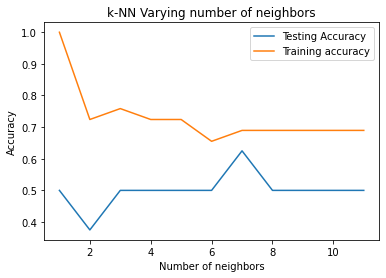

In [177]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
###looks like k is 7 is best for testing accuracy which confirms our findings

In [204]:
from sklearn.metrics import confusion_matrix
y1_pred = neigh_7.predict(X1_test)
confusion_matrix(Y1_test,y1_pred)

array([[2, 0, 1],
       [0, 0, 1],
       [1, 0, 3]], dtype=int64)

In [205]:
pd.crosstab(Y1_test, y1_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,2,All
True,,,
0,2,1,3
1,0,1,1
2,1,3,4
All,3,5,8


In [206]:
from sklearn.metrics import classification_report
print(classification_report(Y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1
           2       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.42      0.47      0.44         8
weighted avg       0.55      0.62      0.58         8



C:\Users\Wind\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [207]:
#Confirm - evaluate accuracies
print("Train set Accuracy using 80/20, k=7: ", neigh_7.score(X1_train, Y1_train)) #neigh_7.predict(X1_train)))
print("Test set Accuracy using 80/20, k=7: ", neigh_7.score(X1_test, Y1_test))

Train set Accuracy using 80/20, k=7:  0.6896551724137931
Test set Accuracy using 80/20, k=7:  0.625


In [215]:
K1 = 15
avg_acc = np.zeros((K1-1))
std_acc = np.zeros((K1-1))
train_acc = np.zeros((K1-1))

for n in range(1,K1):
    
    #Train Model and Predict  
    neigh_1 = KNeighborsClassifier(n_neighbors = n).fit(X1_train,Y1_train)
    Y1_new =neigh_1.predict(X1_test)
    avg_acc[n-1] = metrics.accuracy_score(Y1_test, Y1_new)
    train_acc[n-1] = metrics.accuracy_score(Y1_train, Y1_train)
    std_acc[n-1]=np.std(Y1_new==Y1_test)/np.sqrt(Y1_new.shape[0])

print("Train set Accuracy with different ks: ", train_acc)    
print("Test set Accuracy with different ks: ", avg_acc)

Train set Accuracy with different ks:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Test set Accuracy with different ks:  [0.5   0.375 0.5   0.5   0.5   0.5   0.625 0.5   0.5   0.5   0.5   0.5
 0.5   0.5  ]


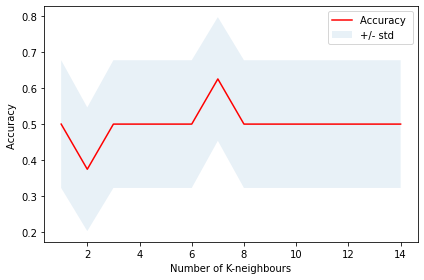

In [214]:
#We can visualise it with a plot to see which ks gives best accuracy
plt.plot(range(1,K1),avg_acc,'r')
plt.fill_between(range(1,K1),avg_acc - 1 * std_acc,avg_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of K-neighbours')
plt.tight_layout()
plt.show()

#this shows that either k= 7 is best



In [210]:
# If I randomly selected 5 stations out of the 37 stations to do testing, ration 13/87, I would achieve a slightly
#better accuracy


In [611]:
print( "The best accuracy was with", avg_acc.max(), "with k=", avg_acc.argmax()+1) 

The best accuracy was with 0.625 with k= 7


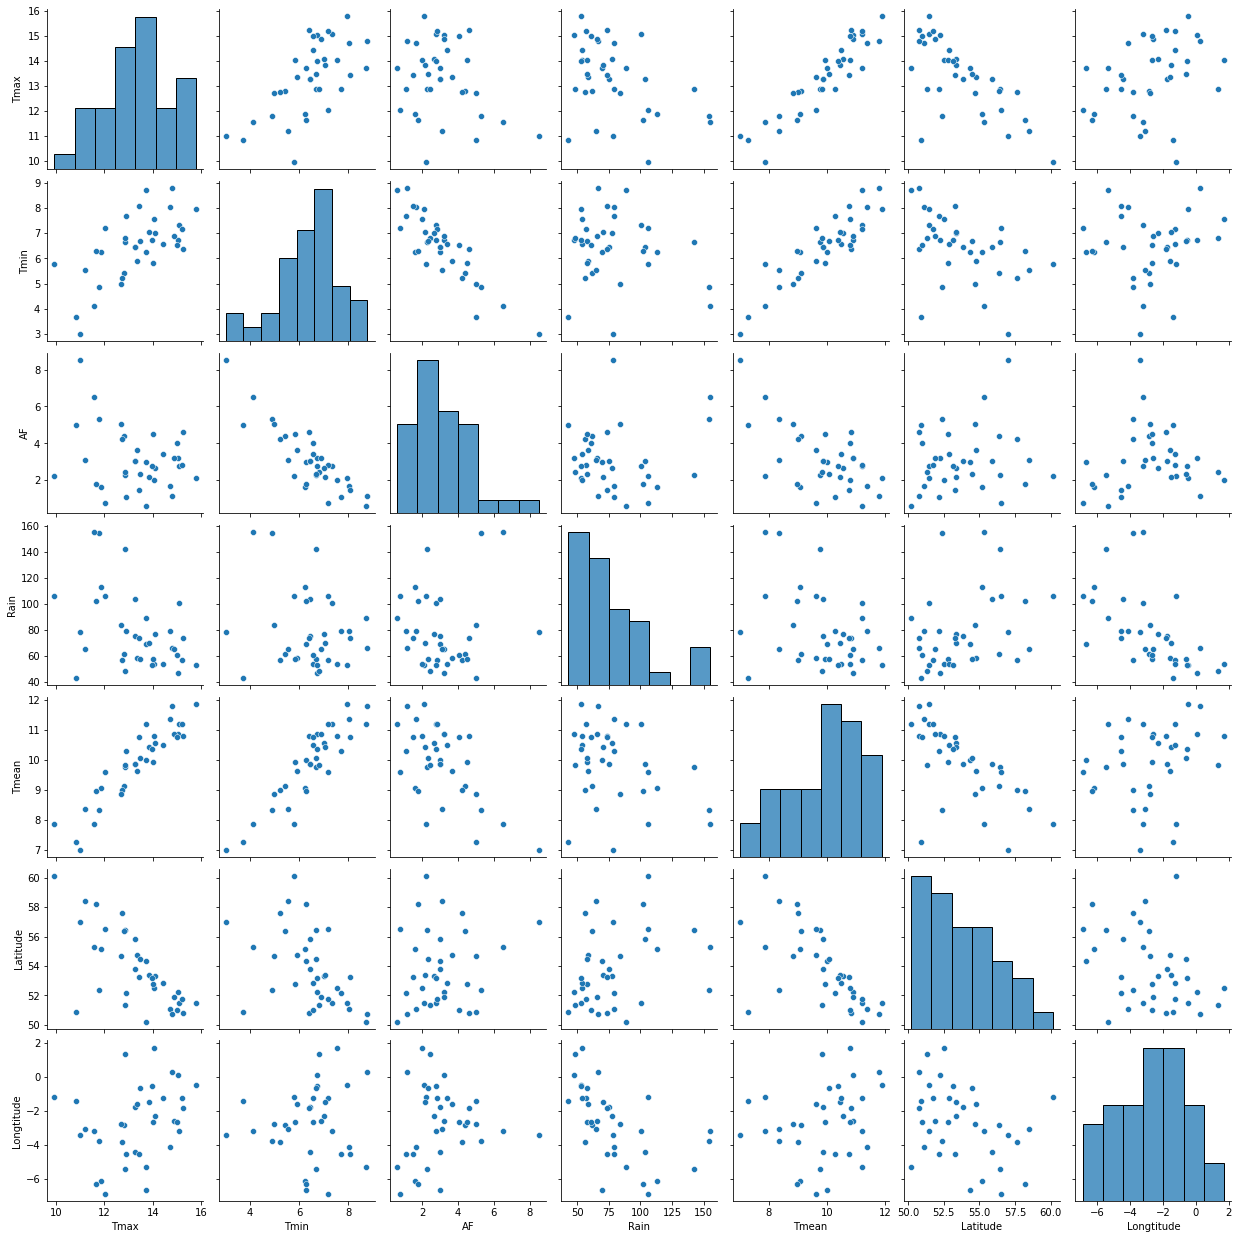

In [241]:
# try plotting
import seaborn as sns
weather_copy.drop(weather_copy[['Month']], axis=1, inplace=True)
sns.pairplot(weather_copy) 

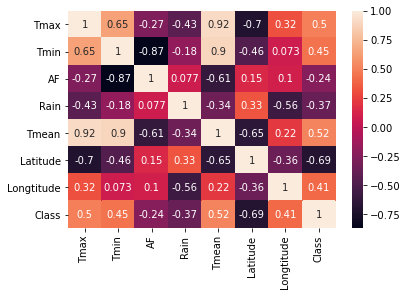

In [345]:
#check correlation between column values
corrMatrix = weather_copy.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
############################## 
#Try classifying using Naive Bayes Classifier
##############################

In [219]:
features = ['Tmean','Rain']
features1 = ['Tmax','Tmin','Tmean', 'AF', 'Rain']
features2 = ['Tmean','AF', 'Rain']
features3 = ['Tmax','Tmin','AF','Rain']
features4 = ['AF','Rain']
features5 = ['Tmean']
location = ['North','Central','South']

In [220]:
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
labels_ff1 =lab_enc.fit_transform(weather_copy['Location'])

In [224]:
ff1_ = weather_copy[features1]
ff1 = ff1_.to_numpy()


In [225]:
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(ff1, labels_ff1, test_size=0.2,random_state=109, stratify=labels_ff1)

In [226]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train_bayes, y_train_bayes)

#Predict the response for test dataset
y_pred_bayes = gnb.predict(X_test_bayes)
y_pred_bayes_train = gnb.predict(X_train_bayes) 

In [227]:
print("Accuracy of train set for feature1:",metrics.accuracy_score(y_train_bayes, y_pred_bayes_train))
print("Accuracy of test set for feature1:",metrics.accuracy_score(y_test_bayes, y_pred_bayes))


Accuracy of train set for feature1: 0.7931034482758621
Accuracy of test set for feature1: 0.75


In [228]:
# check the labels
weather_copy['Class'] = labels_ff1 

In [230]:
weather_copy.drop('Stations_y',axis=1, inplace= True)

In [231]:
weather_copy.groupby('Location').mean()

,Month,Tmax,Tmin,AF,Rain,Tmean,Latitude,Longtitude,Location_Nr,Class
Location,,,,,,,,,,
Central,6.500000,12.655546,5.783110,3.680097,91.981729,9.219328,55.396333,-3.815083,0,0
North,6.500000,11.379556,5.706082,2.835155,82.376389,8.542819,58.600000,-3.602500,1,1
South,6.258333,14.079605,6.968404,2.812007,69.324602,10.524005,51.940619,-1.928571,2,2


In [232]:
# play with other features set to see if we can improve accuracy of test set
#features Tmean and Rain
labels_ff =lab_enc.fit_transform(weather_copy['Location'])
ff_ = weather_copy[features]
ff = ff_.to_numpy()

X_train_bayes_ff, X_test_bayes_ff, y_train_bayes_ff, y_test_bayes_ff = train_test_split(ff, labels_ff, test_size=0.2,random_state=109)
from sklearn.naive_bayes import GaussianNB

gnb.fit(X_train_bayes_ff, y_train_bayes_ff)

y_pred_bayes_ff = gnb.predict(X_test_bayes_ff)
y_pred_bayes_train_ff = gnb.predict(X_train_bayes_ff)

print("Accuracy of train set for features:",metrics.accuracy_score(y_train_bayes_ff, y_pred_bayes_train_ff))
print("Accuracy of test set for features:",metrics.accuracy_score(y_test_bayes_ff, y_pred_bayes_ff))

Accuracy of train set for features: 0.8620689655172413
Accuracy of test set for features: 0.375


In [233]:
#features 4 only AF and Rain
labels_ff4 =lab_enc.fit_transform(weather_copy['Location'])
ff_4 = weather_copy[features4]
ff4 = ff_4.to_numpy()

X_train_bayes_ff4, X_test_bayes_ff4, y_train_bayes_ff4, y_test_bayes_ff4 = train_test_split(ff4, labels_ff4, test_size=0.2,random_state=109)
from sklearn.naive_bayes import GaussianNB

gnb.fit(X_train_bayes_ff4, y_train_bayes_ff4)

y_pred_bayes_ff4 = gnb.predict(X_test_bayes_ff4)
y_pred_bayes_train_ff4 = gnb.predict(X_train_bayes_ff4)

print("Accuracy of train set for features:",metrics.accuracy_score(y_train_bayes_ff4, y_pred_bayes_train_ff4))
print("Accuracy of test set for features:",metrics.accuracy_score(y_test_bayes_ff4, y_pred_bayes_ff4))

Accuracy of train set for features: 0.7931034482758621
Accuracy of test set for features: 0.375


In [320]:
#features 2 only Tmean, AF and Rain
labels_ff2 =lab_enc.fit_transform(weather_copy['Location'])
ff_2 = weather_copy[features2]
ff2 = ff_2.to_numpy()

X_train_bayes_ff2, X_test_bayes_ff2, y_train_bayes_ff2, y_test_bayes_ff2 = train_test_split(ff2, labels_ff2, test_size=0.2,random_state=109)
from sklearn.naive_bayes import GaussianNB

gnb.fit(X_train_bayes_ff2, y_train_bayes_ff2)

y_pred_bayes_ff2 = gnb.predict(X_test_bayes_ff2)
y_pred_bayes_train_ff2 = gnb.predict(X_train_bayes_ff2)

print("Accuracy of train set for features:",metrics.accuracy_score(y_train_bayes_ff2, y_pred_bayes_train_ff2))
print("Accuracy of test set for features:",metrics.accuracy_score(y_test_bayes_ff2, y_pred_bayes_ff2))

Accuracy of train set for features: 0.8620689655172413
Accuracy of test set for features: 0.375


In [416]:
#features 3 
labels_ff3 =lab_enc.fit_transform(weather_copy['Location'])
ff_3 = weather_copy[features3].values
#ff3 = ff_3.to_numpy()

ff3 = preprocessing.StandardScaler().fit(ff_3).transform(ff_3.astype(float)) 


X_train_bayes_ff3, X_test_bayes_ff3, y_train_bayes_ff3, y_test_bayes_ff3 = train_test_split(ff3, labels_ff3, test_size=0.2,random_state=109)

gnb.fit(X_train_bayes_ff3, y_train_bayes_ff3)

y_pred_bayes_ff3 = gnb.predict(X_test_bayes_ff3)
y_pred_bayes_train_ff3 = gnb.predict(X_train_bayes_ff3)

print("Accuracy of train set for features:",metrics.accuracy_score(y_train_bayes_ff3, y_pred_bayes_train_ff3))
print("Accuracy of test set for features:",metrics.accuracy_score(y_test_bayes_ff3, y_pred_bayes_ff3))

Accuracy of train set for features: 0.8620689655172413
Accuracy of test set for features: 0.5


In [415]:
#what about only rain: can u predict based on the rain
#features 5
labels_ff5 =lab_enc.fit_transform(weather_copy['Location'])
ff_5 = weather_copy[features5].values
#ff5 = ff_5.to_numpy()

ff5 = preprocessing.StandardScaler().fit(ff_5).transform(ff_5.astype(float)) 

X_train_bayes_ff5, X_test_bayes_ff5, y_train_bayes_ff5, y_test_bayes_ff5 = train_test_split(ff5, labels_ff5, test_size=0.2,random_state=109)



gnb.fit(X_train_bayes_ff5, y_train_bayes_ff3)

y_pred_bayes_ff5 = gnb.predict(X_test_bayes_ff5)
y_pred_bayes_train_ff5 = gnb.predict(X_train_bayes_ff5)

print("Accuracy of train set for features:",metrics.accuracy_score(y_train_bayes_ff5, y_pred_bayes_train_ff5))
print("Accuracy of test set for features:",metrics.accuracy_score(y_test_bayes_ff5, y_pred_bayes_ff5))

Accuracy of train set for features: 0.6896551724137931
Accuracy of test set for features: 0.5


In [387]:
#for feature 3

y1 = pd.DataFrame(y_train_bayes_ff3)
y2 = pd.DataFrame(y_test_bayes_ff3)

In [388]:
y1.value_counts()

2    18
0     9
1     2
dtype: int64

<AxesSubplot:xlabel='0'>

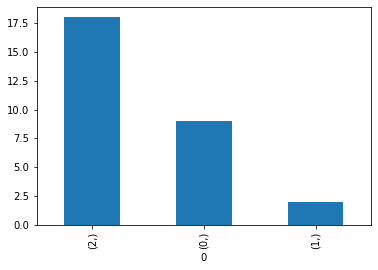

In [389]:
#distribution of the y train set
y1.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='0'>

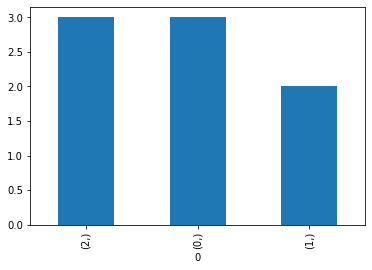

In [390]:
#distribution of the y test set
y2.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='0'>

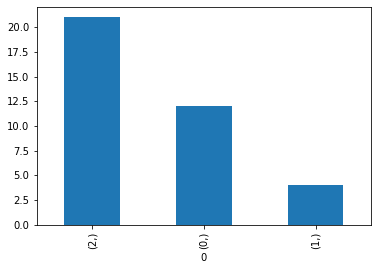

In [402]:
# distribution of both train and test
(y1.value_counts()+ y2.value_counts()).plot(kind='bar')

<AxesSubplot:xlabel='0'>

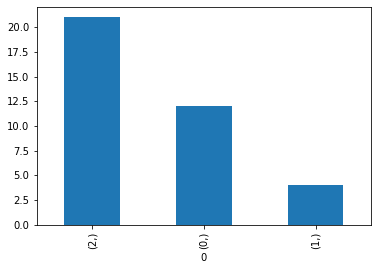

In [406]:
ytotal = pd.DataFrame(labels_ff3)
ytotal.value_counts().plot(kind='bar')
